In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
!pip install spotipy
!pip install lyricsgenius

     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 138 kB 10.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 59 kB 3.4 MB/s 


### Here we define popularity curve to be the number of weekly streams and it has only been fetched when the song is within top 200 songs of that week.

# Read json file

In [ ]:
with open('spotifycharts_data.json', 'r') as f:
  data = json.load(f)

print(data['Closer'])

{'artist': 'The Chainsmokers', 'url': 'https://open.spotify.com/track/7BKLCZ1jbUBVqRi2FVlTVw', 'data': [{'week': '2016-12-23', 'streams': '22047697', 'position': '2'}, {'week': '2016-12-30', 'streams': '23519705', 'position': '2'}, {'week': '2017-01-06', 'streams': '20618002', 'position': '6'}, {'week': '2017-01-13', 'streams': '20211268', 'position': '7'}, {'week': '2017-01-20', 'streams': '19330447', 'position': '7'}, {'week': '2017-01-27', 'streams': '18613708', 'position': '10'}, {'week': '2017-02-03', 'streams': '17769021', 'position': '10'}, {'week': '2017-02-10', 'streams': '17001358', 'position': '12'}, {'week': '2017-02-17', 'streams': '16280761', 'position': '15'}, {'week': '2017-02-24', 'streams': '15728756', 'position': '15'}, {'week': '2017-03-03', 'streams': '14259540', 'position': '33'}, {'week': '2017-03-10', 'streams': '13765540', 'position': '29'}, {'week': '2017-03-17', 'streams': '12542691', 'position': '40'}, {'week': '2017-03-24', 'streams': '12021903', 'position'

## Get songs

In [ ]:
songs = []
for song in data:
  songs.append(song)

num_songs = len(songs)

print(songs)
print(num_songs)

['Starboy', 'Closer', 'Rockabye (feat. Sean Paul & Anne-Marie)', 'Let Me Love You', "Don't Wanna Know", 'Black Beatles', 'I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)"', 'Fake Love', '24K Magic', "Say You Won't Let Go", 'All I Want for Christmas Is You', 'I Feel It Coming', 'One Dance', 'Cold Water (feat. Justin Bieber & MØ)', 'The Greatest', 'In the Name of Love', 'Call On Me - Ryan Riback Extended Remix', 'Chantaje (feat. Maluma)', 'Side To Side', 'Just Hold On', 'Last Christmas', 'Starving', 'Bad and Boujee (feat. Lil Uzi Vert)', 'Bad Things (with Camila Cabello)', 'Mercy', 'My Way', 'Heathens', 'All We Know', "Don't Let Me Down (feat. Daya)", 'Treat You Better', 'Scars To Your Beautiful', 'Reggaetón Lento (Bailemos)', 'Love Me Now', 'All Night', 'CAN\'T STOP THE FEELING! (from DreamWorks Animation\'s "TROLLS")', 'Now and Later', 'The Mack', 'By Your Side', "We Don't Talk Anymore (feat. Selena Gomez)", 'Alone', "It

# Get weeks

In [ ]:
weeks = []
with open("ascending_weeks.txt") as file:
    weeks = [line.rstrip()[0:10] for line in file]

num_weeks = len(weeks)
  
print(weeks)
print(num_weeks)

['2016-12-23', '2016-12-30', '2017-01-06', '2017-01-13', '2017-01-20', '2017-01-27', '2017-02-03', '2017-02-10', '2017-02-17', '2017-02-24', '2017-03-03', '2017-03-10', '2017-03-17', '2017-03-24', '2017-03-31', '2017-04-07', '2017-04-14', '2017-04-21', '2017-04-28', '2017-05-05', '2017-05-12', '2017-05-19', '2017-05-26', '2017-06-02', '2017-06-09', '2017-06-16', '2017-06-23', '2017-06-30', '2017-07-07', '2017-07-14', '2017-07-21', '2017-07-28', '2017-08-04', '2017-08-11', '2017-08-18', '2017-08-25', '2017-09-01', '2017-09-08', '2017-09-15', '2017-09-22', '2017-09-29', '2017-10-06', '2017-10-13', '2017-10-20', '2017-10-27', '2017-11-03', '2017-11-10', '2017-11-17', '2017-11-24', '2017-12-01', '2017-12-08', '2017-12-15', '2017-12-22', '2017-12-29', '2018-01-05', '2018-01-12', '2018-01-19', '2018-01-26', '2018-02-02', '2018-02-09', '2018-02-16', '2018-02-23', '2018-03-02', '2018-03-09', '2018-03-16', '2018-03-23', '2018-03-30', '2018-04-06', '2018-04-13', '2018-04-20', '2018-04-27', '2018

# Store number of streams over the weeks (when in top 200) for each song

In [ ]:
streams = {}

for song in songs:
  streams_list = [0.0]*num_weeks
  for val in data[song]["data"]:
    streams_list[weeks.index(val["week"])] = int(val["streams"])
  streams[song] = streams_list

## No. of streams vs week

In [ ]:
max_num = 20
ind = 0
for song in songs:
  print(song)
  plt.plot(range(0, num_weeks), streams[song])
  plt.show()
  ind+=1
  if ind > max_num:
    break

# Storing Positions

In [ ]:
positions = {}

for song in songs:
  positions_list = [201]*num_weeks
  for val in data[song]["data"]:
    positions_list[weeks.index(val["week"])] = int(val["position"])
  positions[song] = positions_list


## Calculating Start (point it first appeared in top 200) and End (point it last appeared in top 200) Points for each song

In [ ]:
start_end_points = {}
st_end_duration = {}
st_end_duration_vals = [0]*(num_weeks)

for song in songs:
  st_flag = 0
  for i in range(0, len(streams[song])):
    if streams[song][i] > 0:
      if not st_flag:
        start_end_points[song] = {"start": i, "end": i}
      st_flag = 1
      start_end_points[song]["end"]+=1
  st_end_duration_vals[start_end_points[song]["end"]-start_end_points[song]["start"]]+=1

### In order to determine which features may affect the nature of the popularity curve, we look at the audio and lyrical features of the songs.

# Audio Feature Extraction

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [ ]:
credentials = SpotifyClientCredentials(client_id='71c4251838364c17a061e4cd57a350b6', client_secret='9748398cad4649cab85816431445293e')
sp = spotipy.Spotify(client_credentials_manager = credentials)

In [ ]:
def getid(artistname, trackname):
  res = sp.search(trackname, limit = 10)
  for i in range(len(res['tracks']['items'])):
    if res['tracks']['items'][i]['artists'][0]['name'] == artistname:
      return res['tracks']['items'][i]['id']
  else:
    # print("Artistname and trackname not found. Choose another song")
    return -1

In [ ]:
def getspotifyfeatures(trackid):
  urn = "spotify:track:" + trackid
  out = sp.audio_features(tracks=urn)
  return out

In [ ]:
artists = []

for song in songs:
  artists.append(data[song]['artist'])

In [ ]:
ids = []

for ind in range(0, num_songs):
  ids.append(getid(artists[ind], songs[ind]))

In [ ]:
songs_with_id = []
ids_found = []
artists = []

for song in songs:
  if ids[songs.index(song)] != -1:
    songs_with_id.append(song)
    ids_found.append(ids[songs.index(song)])
    artists.append(data[song]['artist'])

print(len(songs_with_id))

with open('songs_with_id.txt', 'w') as f:
    for song in songs_with_id:
        f.write(song)
        f.write('\n')

with open('spotify_ids.txt', 'w') as f:
    for id in ids_found:
        f.write(id)
        f.write('\n')

In [ ]:
songs_with_id = []
with open('songs_with_id.txt') as file:
  for line in file:
        songs_with_id.append(line[:-1])

In [ ]:
ids_found = []
with open('spotify_ids.txt') as file:
    for line in file:
        ids_found.append(line[:-1])

In [ ]:
num_songs_considered = len(songs_with_id)
num_songs_considered

4064

In [ ]:
audio_features = {}

# Lyrical Feature Extraction

In [ ]:
song_lyrics=[]

with open('lyrics.json', 'r') as f:
  lyrics_dict = json.load(f)

for song in songs_with_id:
  song_lyrics.append(lyrics_dict[song])

song_lyrics

## Gloom Index

In [ ]:
def get_words(track):  # in this function we are basically splitting the music track's lyrics into words (and add them to `words` list)
    words = []
    
    for line in track:
        line = line.strip().lower()
        line = line.split()
        
        for word in line:
            if word[0] == '[' or word[-1] == ']':
                continue
            words.append(word)
    return words

In [ ]:
wordsInLyrics=[]
for lyrics in song_lyrics:
  # compScores.append(info_content(lyrics))
  # print(get_words(lyrics))
  wordsInLyrics.append(get_words(lyrics))

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
cleanedWordsInLyrics=[]
cnt=0
for word_list in wordsInLyrics:
  cnt+=1
  # print(cnt)
  filtered_words = [word for word in word_list if word not in stopwords.words('english')]
  cleanedWordsInLyrics.append(filtered_words)

In [ ]:
import nltk
nltk.download('punkt')
from nrclex import NRCLex
pctSadness=[]

for i in range(len(songs_with_id)):
  tot=0
  for text in cleanedWordsInLyrics[i]:
    emotion = NRCLex(text)
    if emotion.affect_frequencies['sadness']>0:
      tot+=1
  if tot==0:
    pctSadness.append(0)
    continue
  pctSadness.append(tot/len(cleanedWordsInLyrics[i]))

In [ ]:
gloomIdx=[]
for i in range(len(songs_with_id)):
  glm=(1-audio_features[songs_with_id[i]][0]['valence'])+pctSadness[i]*(1+1000*len(wordsInLyrics[i])/audio_features[songs_with_id[i]][0]['duration_ms'])
  glm/=2
  gloomIdx.append(glm*100) #so that out of 100

## SMOG Index

In [ ]:
!pip install textstat
import spacy
from textstat.textstat import textstatistics

def break_sentences(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    return list(doc.sents)

def syllables_count(word):
    return textstatistics().syllable_count(word)

def sentence_count(text):
    sentences = break_sentences(text)
    return len(sentences)

def poly_syllable_count(sentences):
    count = 0
    words = []
    for sentence in sentences:
      words=sentence.split()
      for word in words:
          syllable_count = syllables_count(word)
          # print(word,syllable_count)
          if syllable_count >= 3:
              count += 1
    return count

In [ ]:
def smog_index(text):
 
    poly_syllab = poly_syllable_count(text)
    # print(poly_syllab,len(text))
    temTxt=""
    for lyr in text:
      temTxt+=lyr
      temTxt+=" "
    # print(temTxt)
    # print(sentence_count(temTxt))
    if sentence_count(temTxt)==0:
      SMOG=3.1
    else:
      SMOG = (1.043 * (30*(poly_syllab / sentence_count(temTxt)))**0.5)+ 3.1291
    return round(SMOG,1)

smogIndex=[]
cnt=0
for lyr in song_lyrics:
  cnt+=1
  print(cnt)
  smogIndex.append(smog_index(lyr))

smogIndex


## Compressibility Score

In [ ]:
def repeating_length_from_start(window, words): 
    
    assert(type(window) == list)
    assert(type(words) == list)
    
    if window == [] or words == []:
        return 0
    
    if window[0] == words[0]:
        return 1 + repeating_length_from_start(
            window[1:] + [words[0]], words[1:]
        )
    else:
        return 0

def best_length_offset(window, words, max_length, max_offset): 
    
    assert(type(window) == list)
    assert(type(words) == list)
    
    if max_offset < len(window):
        cut_window = window[-max_offset:]
    else:
        cut_window = window
        
    if words == [] or words is None:
        return (0, 0)
    
    length, offset = (1, 0)
    
    if words[0] not in cut_window:
        best_length = repeating_length_from_start([words[0]], words[1:])
        return (min((length + best_length), max_length), offset)
    
    length = 0
    
    for index in range(1, (len(cut_window) + 1)):
        # Get the word at this offset
        word = cut_window[-index]
        
        if word == words[0]:
            found_offset = index

            # Collect any further strings which can be found
            found_length = repeating_length_from_start(
                cut_window[-index:], words
            )

            if found_length > length:
                length = found_length
                offset = found_offset

    return (min(length, max_length), offset)

def compress(words): 
    
    window = []
    output = []
    while words != []:
        length, offset = best_length_offset(window, words, 500, 500)
        output.append((offset, length, words[0]))
        window.extend(words[:length])
        words = words[length:]
        
    return output

def info_content(track): 
    words = []
    
    for para in track:
        for line in para:
            line = line.strip().lower()
            line = line.split()
            
            for word in line:
                if word[0] == '[' or word[-1] == ']':
                    continue
                words.append(word)
                
    out = compress(words) 

    
    return out

In [ ]:
compScores=[]
cnt=0
for lyrics in song_lyrics:
  # compScores.append(info_content(lyrics))
  cnt+=1
  # print(cnt)
  tot=0
  for tupT in info_content(lyrics):
    tot+=tupT[1]
  if tot==0:
    compScores.append(0.55)
  else:
    compScores.append((1-len(info_content(lyrics))/tot))

In [ ]:
lyrical_feat={}

In [ ]:
for i in range(len(songs_with_id)):
  lyrical_feat[songs_with_id[i]]={
      'compressibility':compScores[i],
      'gloom_index':gloomIdx[i]
      }
lyrical_feat

In [ ]:
with open("lyrical_features.json", "w") as outfile:
    json.dump(lyrical_feat, outfile, indent=2)

In [ ]:
for ind in range(0, num_songs_considered):
  audio_features[songs_with_id[ind]] = getspotifyfeatures(ids_found[ind])

In [ ]:
with open('lyrical_features.json', 'r') as f:
  lyrical_data = json.load(f)

print(lyrical_data)

{'Starboy': {'gloom_index': 32.70047718077845}, 'Closer': {'gloom_index': 26.95188469141415}, 'Rockabye (feat. Sean Paul & Anne-Marie)': {'gloom_index': 15.209260708329825}, 'Let Me Love You': {'gloom_index': 43.58268790028502}, "Don't Wanna Know": {'gloom_index': 36.2772578342882}, 'Black Beatles': {'gloom_index': 43.14687209209949}, 'Fake Love': {'gloom_index': 26.348095770709772}, '24K Magic': {'gloom_index': 22.837097130759044}, "Say You Won't Let Go": {'gloom_index': 31.67381193081646}, 'All I Want for Christmas Is You': {'gloom_index': 33.118304272176495}, 'I Feel It Coming': {'gloom_index': 21.30251151768268}, 'One Dance': {'gloom_index': 33.369398466137326}, 'Cold Water (feat. Justin Bieber & MØ)': {'gloom_index': 31.431565317613337}, 'The Greatest': {'gloom_index': 16.77581176141791}, 'In the Name of Love': {'gloom_index': 49.39114619975304}, 'Chantaje (feat. Maluma)': {'gloom_index': 8.300696389666976}, 'Side To Side': {'gloom_index': 23.445571920120912}, 'Just Hold On': {'gl

In [ ]:
lyrical_features = {}
for ind in range(0, num_songs_considered):
  lyrical_features[songs_with_id[ind]] = [lyrical_data[songs_with_id[ind]]]

# Storing song and its features data

In [ ]:
spotify_data = {}

for i in range(num_songs_considered):
  spotify_data[songs_with_id[i]] = {"id": ids_found[i], "audio_features": audio_features[songs_with_id[i]], "lyrical_features": lyrical_features[songs_with_id[i]], "popularity_data": data[songs_with_id[i]]["data"]}

print(spotify_data['Closer'])


{'id': '7BKLCZ1jbUBVqRi2FVlTVw', 'audio_features': [{'danceability': 0.748, 'energy': 0.524, 'key': 8, 'loudness': -5.599, 'mode': 1, 'speechiness': 0.0338, 'acousticness': 0.414, 'instrumentalness': 0, 'liveness': 0.111, 'valence': 0.661, 'tempo': 95.01, 'type': 'audio_features', 'id': '7BKLCZ1jbUBVqRi2FVlTVw', 'uri': 'spotify:track:7BKLCZ1jbUBVqRi2FVlTVw', 'track_href': 'https://api.spotify.com/v1/tracks/7BKLCZ1jbUBVqRi2FVlTVw', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7BKLCZ1jbUBVqRi2FVlTVw', 'duration_ms': 244960, 'time_signature': 4}], 'lyrical_features': [{'gloom_index': 26.95188469141415}], 'popularity_data': [{'week': '2016-12-23', 'streams': '22047697', 'position': '2'}, {'week': '2016-12-30', 'streams': '23519705', 'position': '2'}, {'week': '2017-01-06', 'streams': '20618002', 'position': '6'}, {'week': '2017-01-13', 'streams': '20211268', 'position': '7'}, {'week': '2017-01-20', 'streams': '19330447', 'position': '7'}, {'week': '2017-01-27', 'streams': '18

## Checking the duration in top 200 distribution for songs considered

[0, 1224, 428, 253, 201, 179, 113, 103, 94, 76, 78, 61, 75, 66, 58, 55, 40, 41, 39, 42, 33, 36, 42, 36, 32, 27, 25, 25, 26, 32, 30, 25, 19, 20, 21, 26, 21, 16, 15, 13, 14, 7, 9, 16, 7, 16, 15, 11, 6, 5, 5, 11, 6, 7, 5, 12, 8, 4, 6, 4, 6, 3, 5, 2, 4, 4, 4, 5, 1, 2, 4, 6, 6, 2, 4, 2, 3, 2, 2, 3, 4, 0, 1, 4, 4, 0, 1, 4, 4, 0, 2, 0, 0, 0, 0, 3, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 1, 3, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]


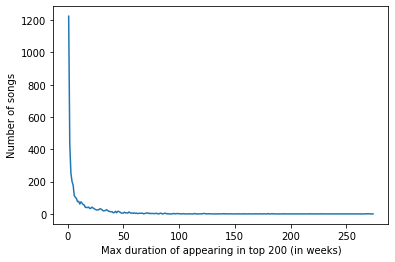

In [ ]:
duration_in_200 = [0]*(num_weeks)

for song in songs_with_id:
  duration_in_200[start_end_points[song]["end"]-start_end_points[song]["start"]]+=1

print(duration_in_200)
plt.xlabel("Max duration of appearing in top 200 (in weeks)")
plt.ylabel("Number of songs")
plt.plot(range(1, num_weeks), duration_in_200[1:])

# Considering songs that have appeared in top 50 at least once 

In [ ]:
pre_final_songs = []
for song in songs_with_id:
  for pos in positions[song]:
    if pos < 50:
      pre_final_songs.append(song)
      break

In [ ]:
len(pre_final_songs)

1388

# Taking window size of 20

In [ ]:
window_selected = 20
final_songs = []

streaming_curves = {}
for song in pre_final_songs:
  start = int(start_end_points[song]["start"])
  end = start + int(window_selected)
  if end < len(streams[song]) and start < len(streams[song]) - window_selected:
    streaming_curves[song] = streams[song][start:end]
    final_songs.append(song)

print(len(streaming_curves))

1301


In [ ]:
# max_num = 20
# ind = 0
# for song in final_songs:
#   print(song)
#   plt.plot(range(0, len(streaming_curves[song])), streaming_curves[song])
#   plt.show()
#   ind+=1
#   if ind > max_num:
#     break

# Effect of feature value on popularity curve 

In [ ]:
features = ["danceability", 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'mode', 'tempo', 'gloom_index']

In [ ]:
feature_stats = {}
for feat in features:
  stats = {'values': [], 'min': 0.0, 'max': 0.0, 'mean': 0.0, 'median': 0.0, 'std': 0.0}
  for song in final_songs:
    feat_type = "audio_features"
    if feat == "gloom_index":
      feat_type = "lyrical_features"
    stats['values'].append(spotify_data[song][feat_type][0][feat])
  stats['min'] = np.min(stats['values'])
  stats['max'] = np.max(stats['values'])
  stats['mean'] = np.mean(stats['values'])
  stats['median'] = np.median(stats['values'])
  stats['std'] = np.std(stats['values'])
  feature_stats[feat] = stats

In [ ]:
stats_data = []
for feat in features:
  stats_data.append([feature_stats[feat]['values'], feature_stats[feat]['min'], feature_stats[feat]['max'], feature_stats[feat]['median'], feature_stats[feat]['mean'], feature_stats[feat]['std']])

features_stats_df = pd.DataFrame(stats_data, features, ['values', 'min', 'max', 'mean', 'median', 'std'])
features_stats_df

,values,min,max,mean,median,std
danceability,"[0.679, 0.748, 0.72, 0.649, 0.783, 0.794, 0.92...",0.161000,0.974000,0.710000,0.690065,0.137599
energy,"[0.587, 0.524, 0.763, 0.716, 0.61, 0.632, 0.48...",0.056100,0.955000,0.637000,0.623810,0.158105
loudness,"[-7.015, -5.599, -4.068, -5.371, -6.124, -6.16...",-23.023000,-1.587000,-5.991000,-6.337810,2.354346
speechiness,"[0.276, 0.0338, 0.0523, 0.0349, 0.0696, 0.0649...",0.025100,0.966000,0.075600,0.127681,0.117544
acousticness,"[0.141, 0.414, 0.406, 0.0863, 0.343, 0.142, 0....",0.000187,0.993000,0.143000,0.234800,0.244965
instrumentalness,"[6.35e-06, 0, 0, 2.63e-05, 0, 0, 0, 0, 0, 0, 0...",0.000000,0.918000,0.000000,0.008797,0.061969
liveness,"[0.137, 0.111, 0.18, 0.135, 0.0983, 0.128, 0.1...",0.021500,0.913000,0.125000,0.177273,0.132858
valence,"[0.486, 0.661, 0.742, 0.163, 0.418, 0.355, 0.6...",0.032000,0.969000,0.477000,0.482842,0.223685
mode,"[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, ...",0.000000,1.000000,1.000000,0.578786,0.493754
tempo,"[186.003, 95.01, 101.965, 99.988, 100.047, 145...",57.967000,205.272000,118.159000,120.924633,29.642682


In [ ]:
# Taking bins min to median, median to max : low, high
avg_2binned_streaming_curves = {}

for feat in features:
  feat_type = "audio_features"
  if feat == "gloom_index":
    feat_type = "lyrical_features"
  lower_curve = [0.0] * window_selected
  higher_curve = [0.0] * window_selected

  low_num = [0] * window_selected
  high_num = [0] * window_selected

  for song in final_songs:
    if(spotify_data[song][feat_type][0][feat]<features_stats_df.loc[feat, 'median'] and spotify_data[song][feat_type][0][feat]>=(features_stats_df.loc[feat, 'min'])):
      for ind in range(0, len(streaming_curves[song])):
        lower_curve[ind] += streaming_curves[song][ind]
        low_num[ind]+=1

    elif(spotify_data[song][feat_type][0][feat]>=features_stats_df.loc[feat, 'median'] and spotify_data[song][feat_type][0][feat]<=(features_stats_df.loc[feat, 'max'])):
      for ind in range(0, len(streaming_curves[song])):
        higher_curve[ind] += streaming_curves[song][ind]
        high_num[ind]+=1

  for ind in range(0, window_selected):
    lower_curve[ind] = lower_curve[ind] / max(1, low_num[ind])
    higher_curve[ind] = higher_curve[ind] / max(1, high_num[ind])

  avg_2binned_streaming_curves[feat] = [lower_curve, higher_curve]


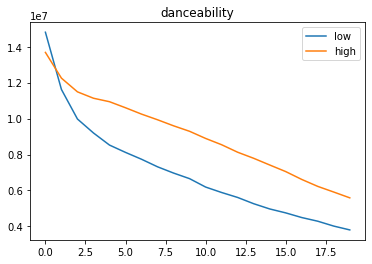

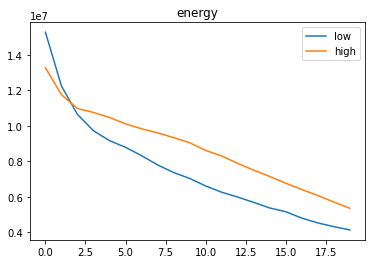

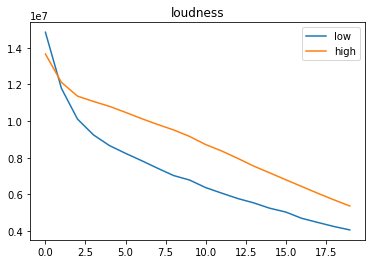

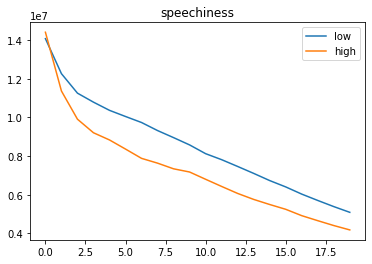

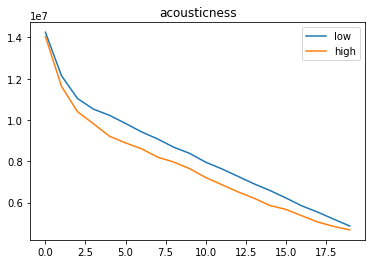

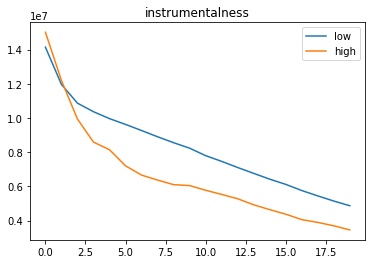

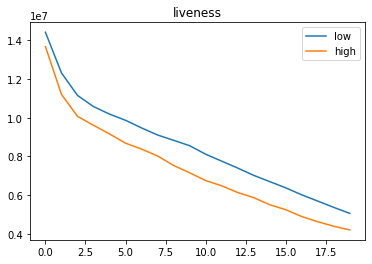

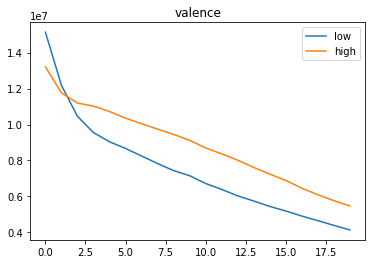

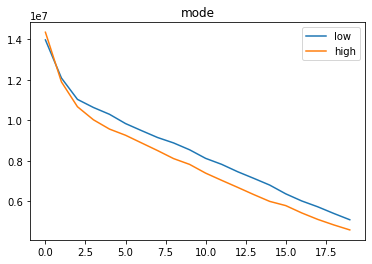

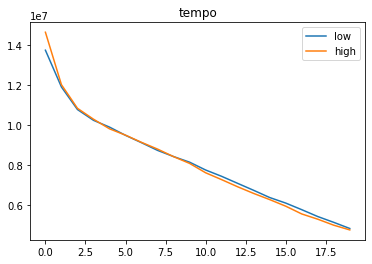

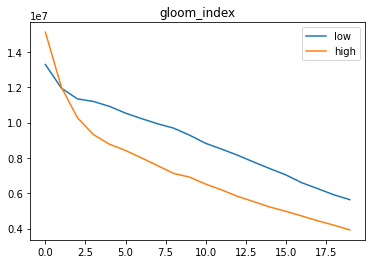

In [ ]:
for feat in features:
  for i in range(0, 2):
    plt.title(feat)
    label = ''
    if i == 0:
      label = "low"
    else:
      label = "high"
    plt.plot(range(0, len(avg_2binned_streaming_curves[feat][i])), avg_2binned_streaming_curves[feat][i], label=label)
  plt.legend()
  plt.show()

In [ ]:
# Taking bins min to mean-std, mean-std to mean+std, mean+std to max : low, med, high
avg_3binned_streaming_curves = {}

for feat in features:
  feat_type = "audio_features"
  if feat == "gloom_index":
    feat_type = "lyrical_features"
  low_curve = [0.0] * window_selected
  medium_curve = [0.0] * window_selected
  high_curve = [0.0] * window_selected

  low_num = [0] * window_selected
  med_num = [0] * window_selected
  high_num = [0] * window_selected

  percen_25 = np.percentile(features_stats_df.loc[feat, 'values'], 25)
  percen_75 = np.percentile(features_stats_df.loc[feat, 'values'], 75)

  for song in final_songs:
    if(spotify_data[song][feat_type][0][feat]<percen_25 and spotify_data[song][feat_type][0][feat]>=(features_stats_df.loc[feat, 'min'])):
      for ind in range(0, len(streaming_curves[song])):
        low_curve[ind] += streaming_curves[song][ind]
        low_num[ind]+=1

    elif(spotify_data[song][feat_type][0][feat]>=percen_25 and spotify_data[song][feat_type][0][feat]<percen_75):
      for ind in range(0, len(streaming_curves[song])):
        medium_curve[ind] += streaming_curves[song][ind]
        med_num[ind]+=1

    elif(spotify_data[song][feat_type][0][feat]>=percen_75 and spotify_data[song][feat_type][0][feat]<=(features_stats_df.loc[feat, 'max'])):
      for ind in range(0, len(streaming_curves[song])):
        high_curve[ind] += streaming_curves[song][ind]
        high_num[ind]+=1

  for ind in range(0, window_selected):
    low_curve[ind] = low_curve[ind] / max(1, low_num[ind])
    medium_curve[ind] = medium_curve[ind] / max(1, med_num[ind])
    high_curve[ind] = high_curve[ind] / max(1, high_num[ind])

  avg_3binned_streaming_curves[feat] = [low_curve, medium_curve, high_curve]


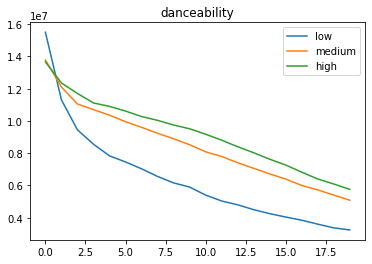

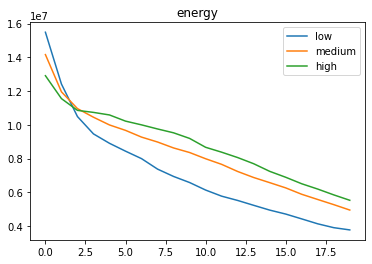

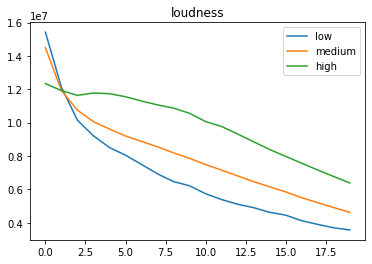

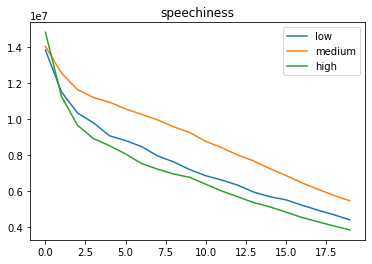

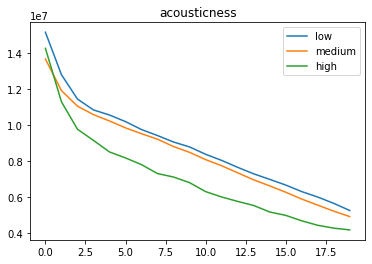

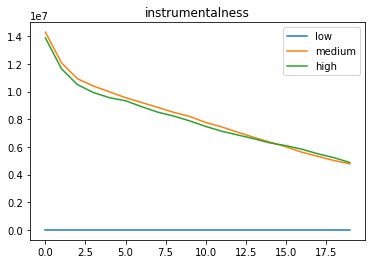

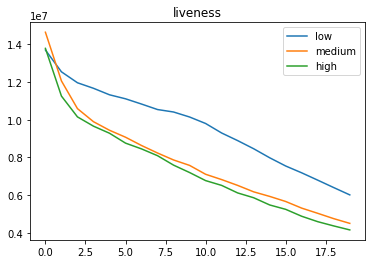

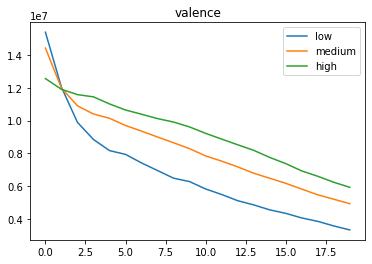

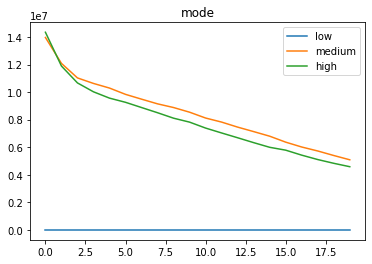

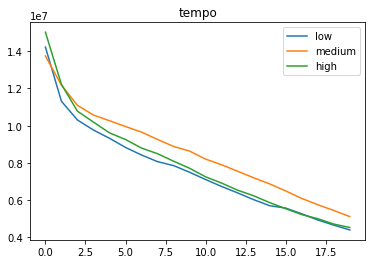

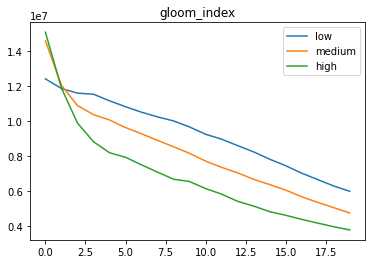

In [ ]:
for feat in features:
  for i in range(0, 3):
    plt.title(feat)
    label = ''
    if i == 0:
      label = "low"
    elif i == 1:
      label = "medium"
    else:
      label = "high"
    plt.plot(range(0, len(avg_3binned_streaming_curves[feat][i])), avg_3binned_streaming_curves[feat][i], label=label)

  plt.legend()
  plt.show()

# Popularity Curve Nature

### We can see some features related to the nature of the curve as follows:
1. Duration of peak phases
2. Number of peaks
3. Nature of peaks
  - Quick peak with exponential decay
  - Hill-like curve: Bell curve like
  - Persistent Peak: Rectangular
  - Needle-like curve: Small duration of peak

In [ ]:
peaks_data = {}
num_peaks = []
peak_max_dur = [0] * len(songs)
mx_peak_vals = [0] * len(songs)

high_num_peak_songs = []
high_max_peak_dur_songs = []
high_max_peak_songs = []

n_peaks = {}
dur_peaks = {}
mx_peaks = {}

idx = 0
for song in songs:
  peaks_data[song] = []
  dur = []
  max_pk = []
  peak = {'values': [], 'start': 0.0, 'end': 0.0, 'dur': 0.0, 'max': 0.0, 'mean': 0.0, 'std': 0.0}
  flag = 0
  for ind in range(0, len(streams[song])):
    if streams[song][ind] == 0 and flag:
      flag = 0
      peak['end'] = ind-1
      peak['dur'] = peak['end'] - peak['start'] + 1
      peak['max'] = np.max(peak['values'])
      peak['mean'] = np.mean(peak['values'])
      peak['std'] = np.std(peak['values'])
      peaks_data[song].append(peak)
      dur.append(peak['dur'])
      max_pk.append(peak['max'])
      peak = {'values': [], 'start': 0.0, 'end': 0.0, 'dur': 0.0, 'max': 0.0, 'mean': 0.0, 'std': 0.0}
    if streams[song][ind] > 0 and not flag:
      peak['start'] = ind
      flag = 1
    if flag:
      peak['values'].append(streams[song][ind])

  if flag:
    flag = 0
    peak['end'] = len(streams[song])-1
    peak['dur'] = peak['end'] - peak['start'] + 1
    peak['max'] = np.max(peak['values'])
    peak['mean'] = np.mean(peak['values'])
    peak['std'] = np.std(peak['values'])
    peaks_data[song].append(peak)
    dur.append(peak['dur'])
    max_pk.append(peak['max'])
  
  num_peaks.append(len(peaks_data[song]))
  n_peaks[song] = len(peaks_data[song])
  if(len(peaks_data[song]) > 4):
    high_num_peak_songs.append(song)
  if(len(dur) >= 1):
    peak_max_dur[idx] = np.max(dur)
    dur_peaks[song] = np.max(dur)
    if(peak_max_dur[idx] > 12):
      high_max_peak_dur_songs.append(song)
  if len(max_pk) >= 1:
    mx_peak_vals[idx] = np.max(max_pk)
    mx_peaks[song] = np.max(max_pk)
    if(mx_peak_vals[idx] > 5*(10**7)):
      high_max_peak_songs.append(song)
  idx+=1


# Songs with high number of peaks

[0, 3490, 473, 116, 63, 33, 32, 13, 2, 4, 4, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1]
4237


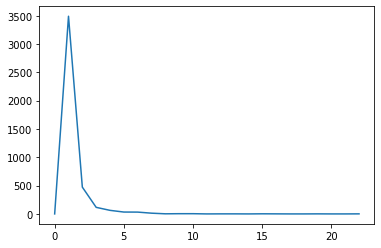

In [ ]:
max_peaks = np.max(num_peaks)
min_peaks = np.min(num_peaks)
peak_pdf = [0] * (max_peaks + 1)
for i in range(0, len(num_peaks)):
  peak_pdf[num_peaks[i]] += 1

print(peak_pdf)
plt.plot(range(0, max_peaks+1), peak_pdf)
print(sum(peak_pdf))

Starboy


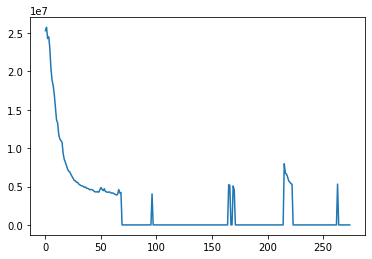

Closer


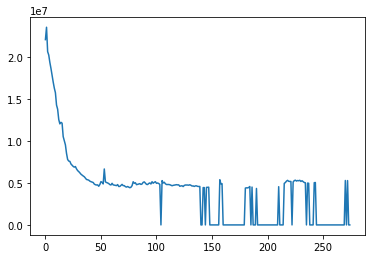

Say You Won't Let Go


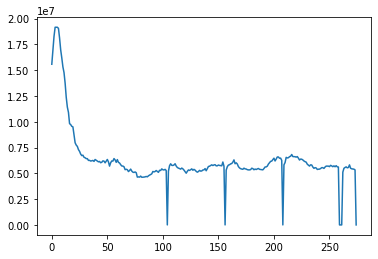

I Feel It Coming


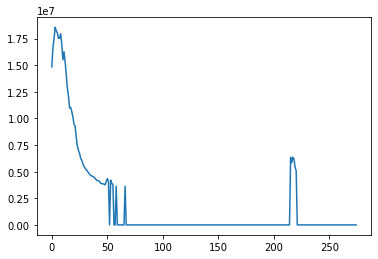

One Dance


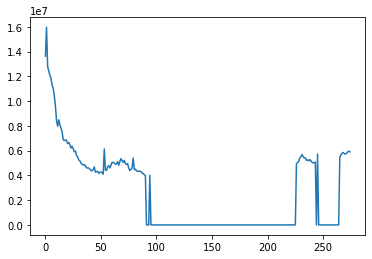

Treat You Better


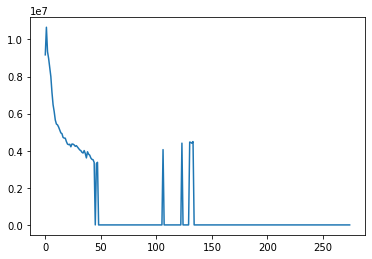

It's Beginning to Look a Lot like Christmas


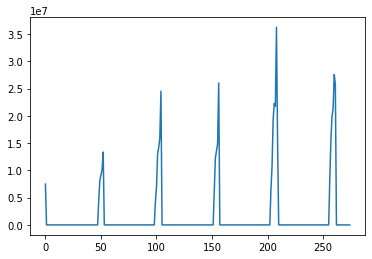

It's the Most Wonderful Time of the Year


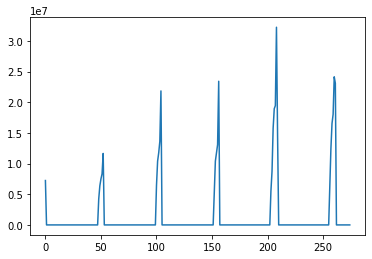

Jingle Bell Rock


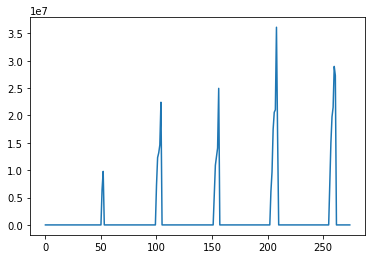

Let It Snow! Let It Snow! Let It Snow! (with The B. Swanson Quartet)


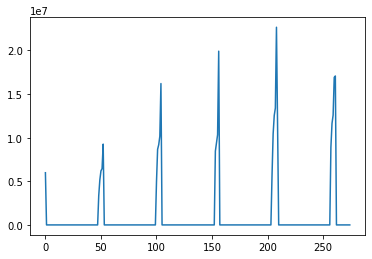

Feliz Navidad


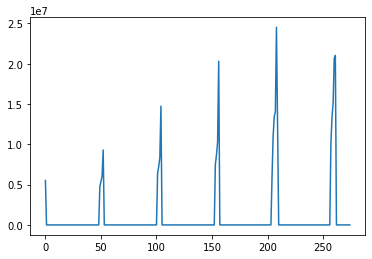

Do They Know It's Christmas? - 1984 Version


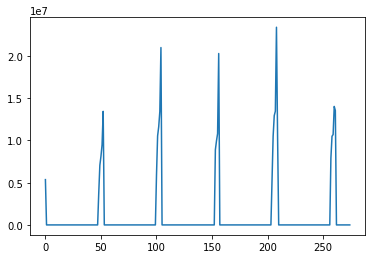

Blue Christmas


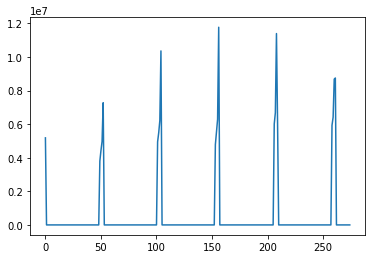

Santa Tell Me


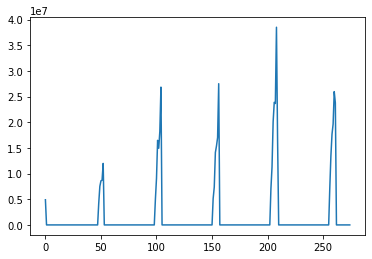

Happy Xmas (War Is Over) - Remastered 2010


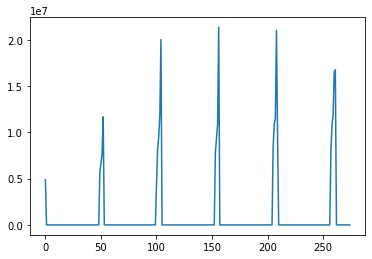

Mistletoe


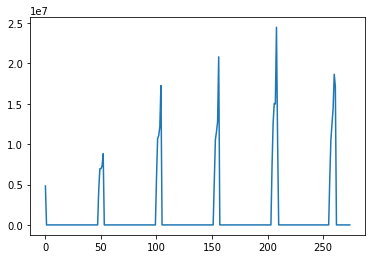

The Christmas Song (Merry Christmas To You)


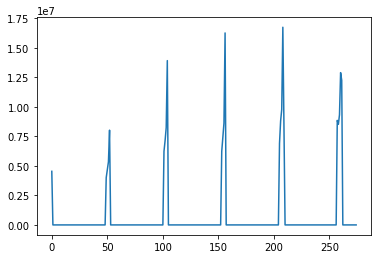

Fairytale of New York (feat. Kirsty MacColl)


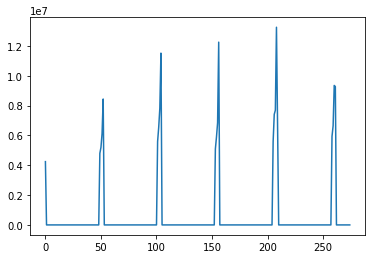

Photograph


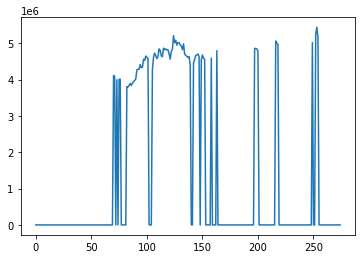

Run Rudolph Run - Single Version


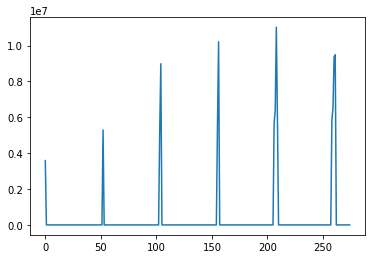

It's Beginning to Look a Lot Like Christmas (with Mitchell Ayres & His Orchestra)


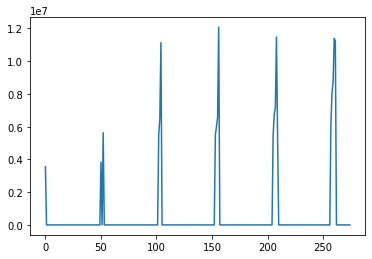

A Holly Jolly Christmas - Single Version


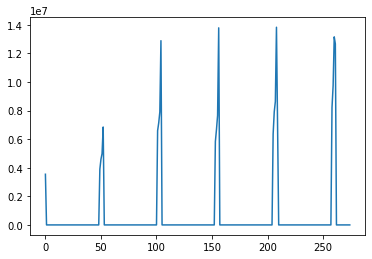

Thinking out Loud


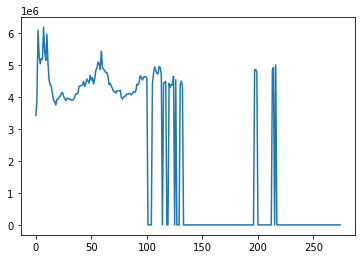

Step Into Christmas


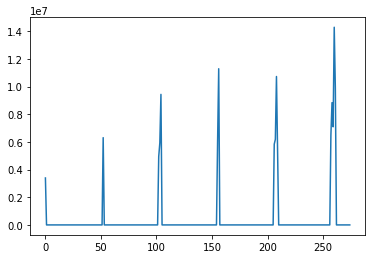

Holly Jolly Christmas


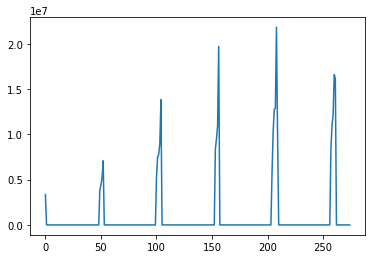

Santa Claus Is Comin' to Town - Live at C.W. Post College, Greenvale, NY - December 1975


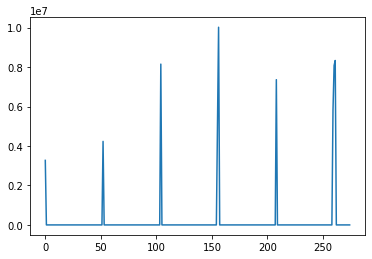

Santa Baby (with Henri René & His Orchestra)


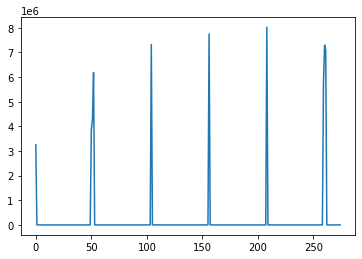

Santa Claus Is Coming to Town


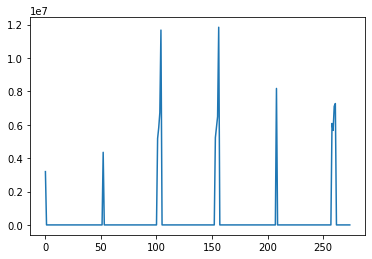

Have Yourself A Merry Little Christmas


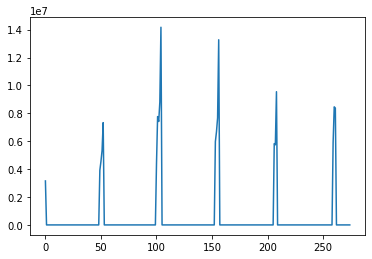

Carol of the Bells


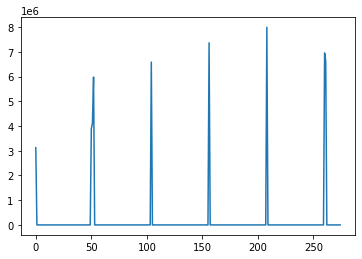

The Hills


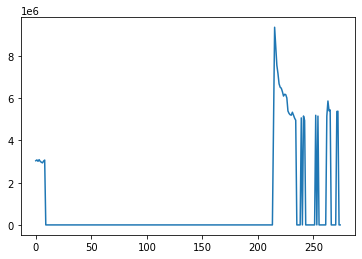

My Only Wish (This Year)


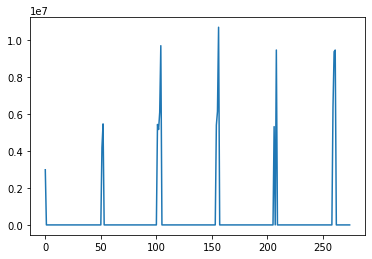

Christmas Lights


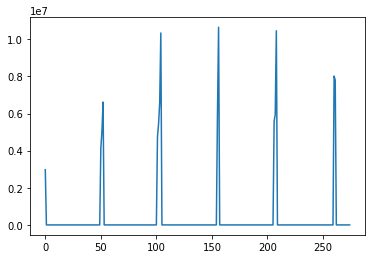

No Role Modelz


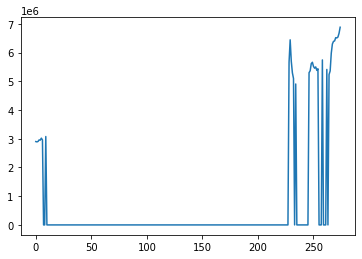

Lose Yourself - From "8 Mile" Soundtrack


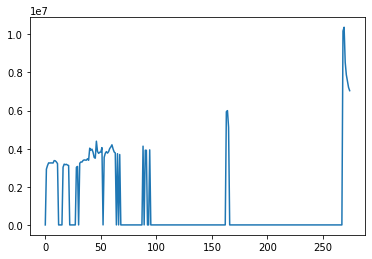

Bohemian Rhapsody - Remastered 2011


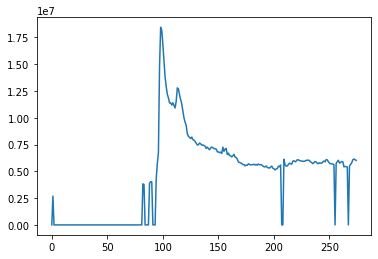

Can't Hold Us (feat. Ray Dalton)


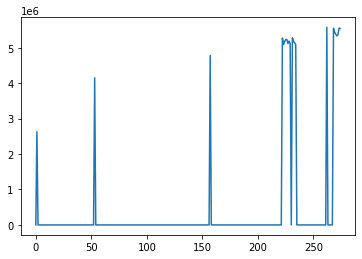

goosebumps


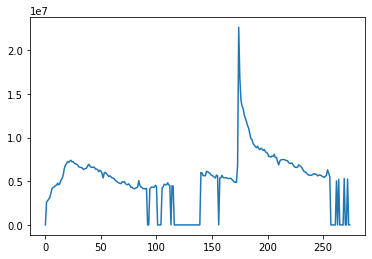

Mr. Brightside


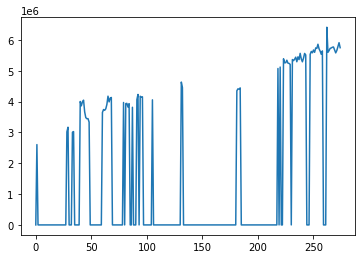

White Iverson


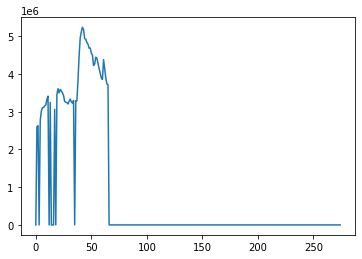

All of Me


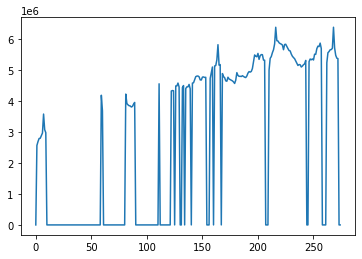

Let Her Go


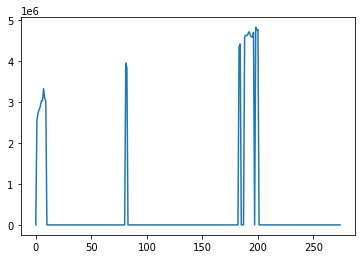

'Till I Collapse


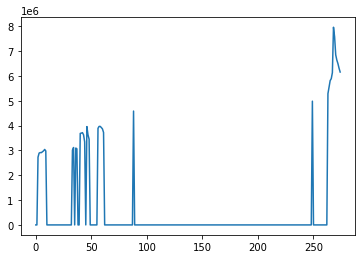

Congratulations


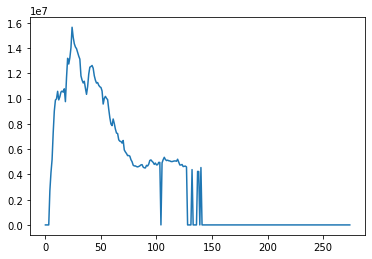

Take Me To Church


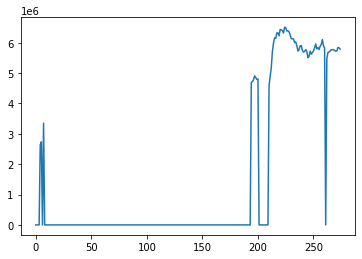

The Scientist


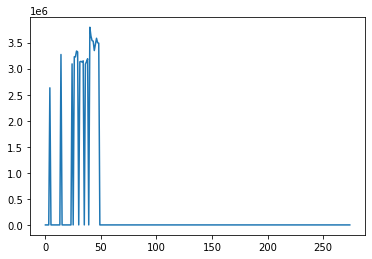

Halo


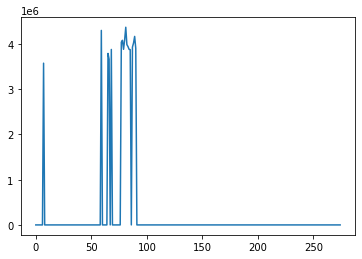

Wonderwall - Remastered


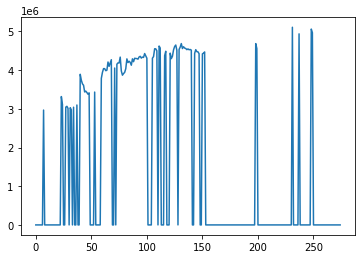

Something Just Like This


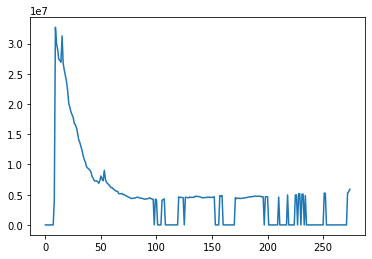

Look At Me!


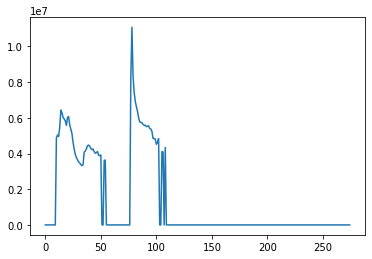

HUMBLE.


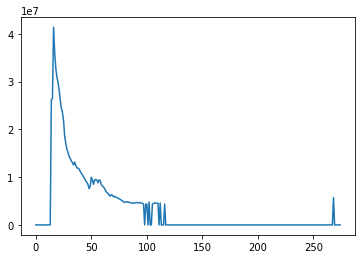

BUTTERFLY EFFECT


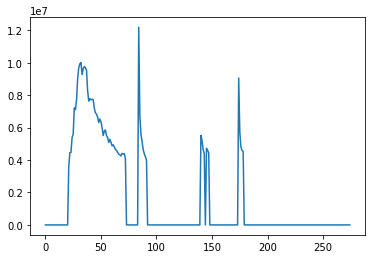

Blank Space


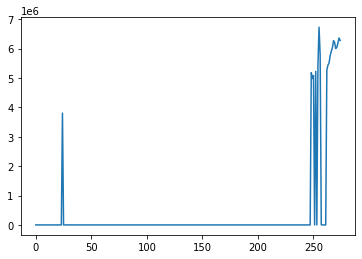

In the End


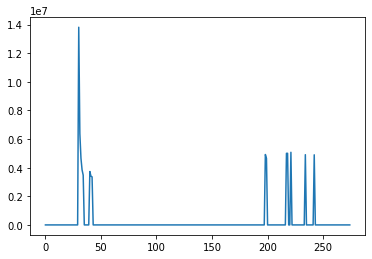

XO Tour Llif3


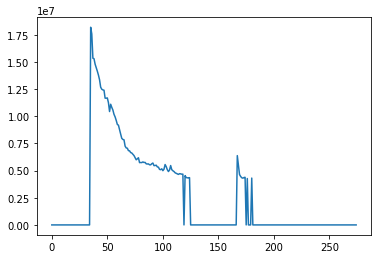

Jocelyn Flores


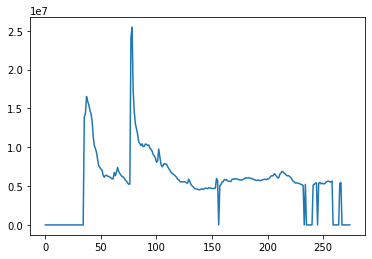

Everybody Dies In Their Nightmares


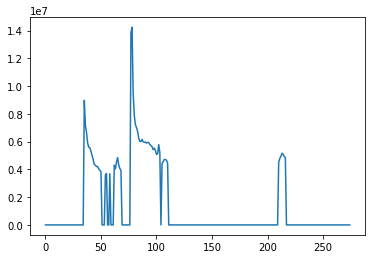

Wolves


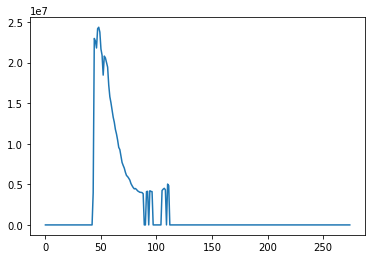

Ric Flair Drip (with Metro Boomin)


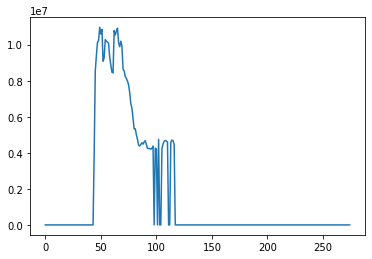

Santa's Coming for Us


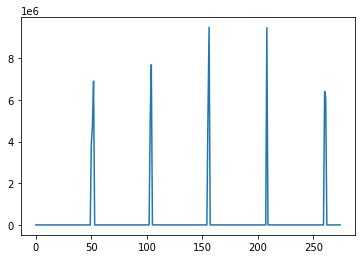

Underneath the Tree


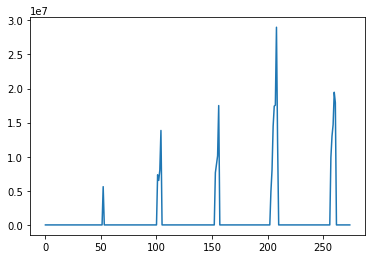

Jingle Bell Rock - Daryl's Version


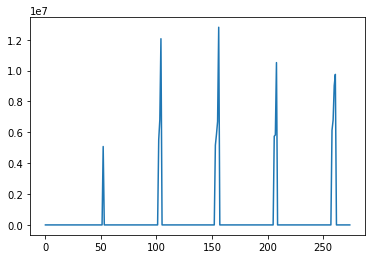

Little Saint Nick - 1991 Remix


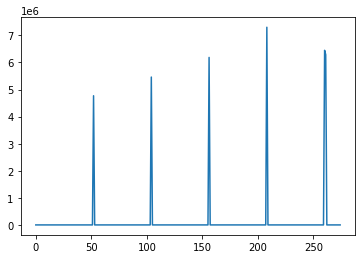

Santa Claus Is Coming To Town


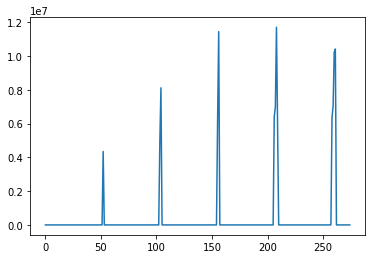

Thank God It's Christmas - Non-Album Single


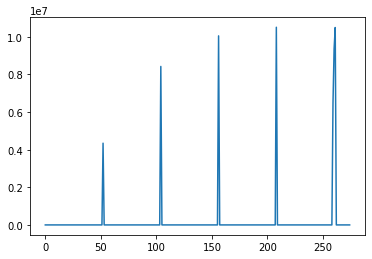

September


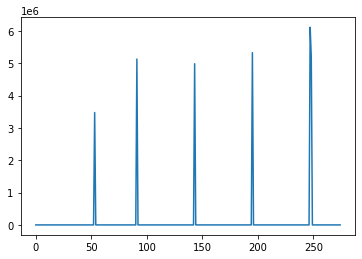

God's Plan


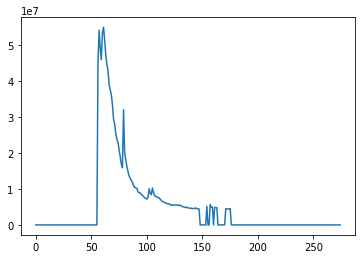

Africa


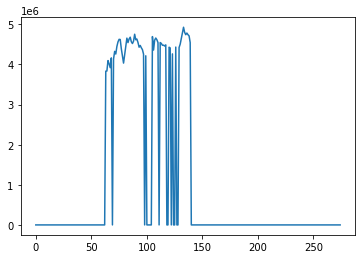

Moonlight


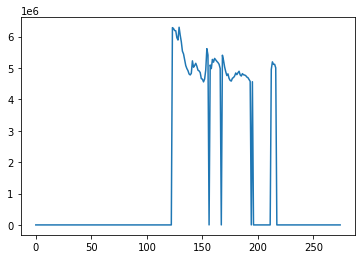

I'm Yours


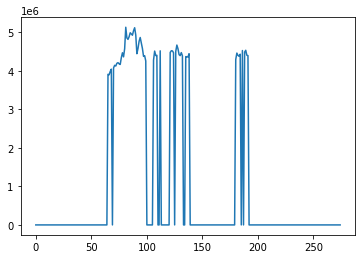

Call Out My Name


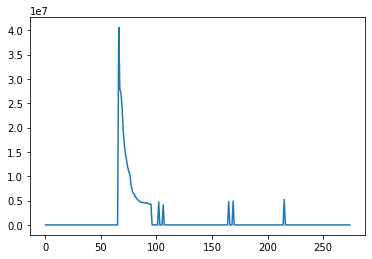

All Girls Are The Same


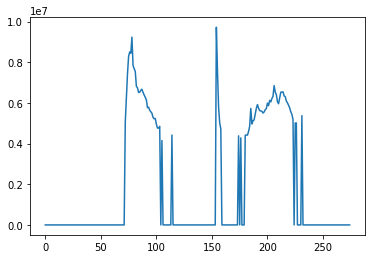

ocean eyes


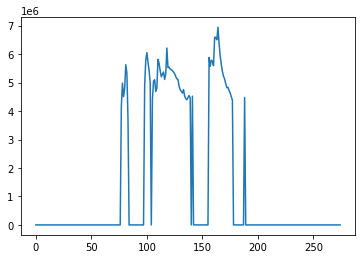

High Hopes


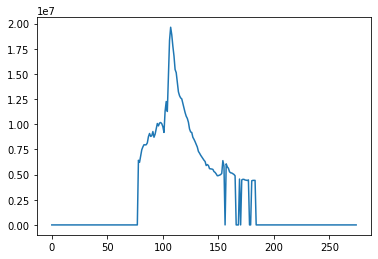

Let Me Down Slowly


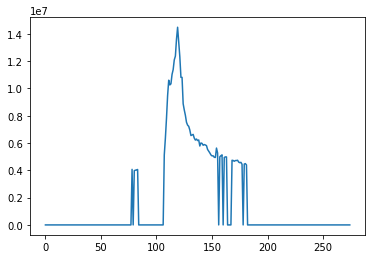

Wake Me Up


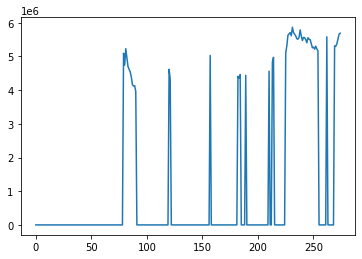

Be Alright


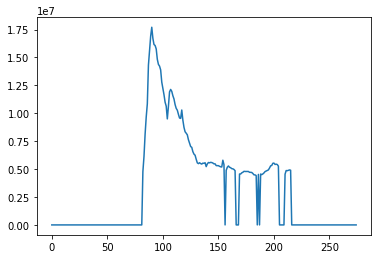

Ibiza


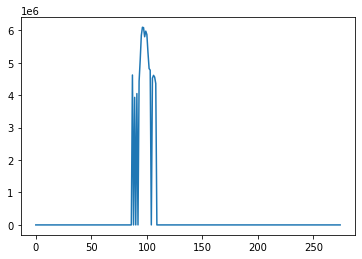

SLOW DANCING IN THE DARK


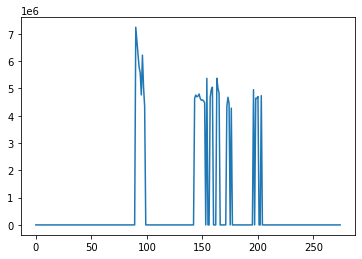

Don't Stop Me Now - Remastered 2011


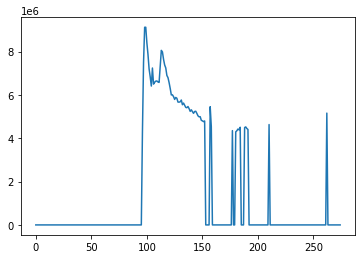

Murder On My Mind


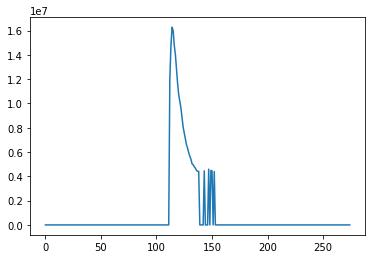

all the good girls go to hell


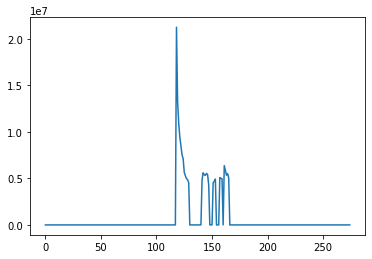

i love you


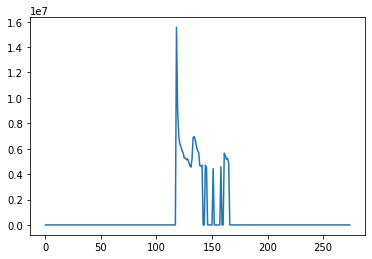

Boy With Luv (feat. Halsey)


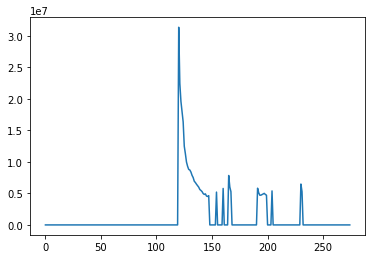

Get You The Moon (feat. Snøw)


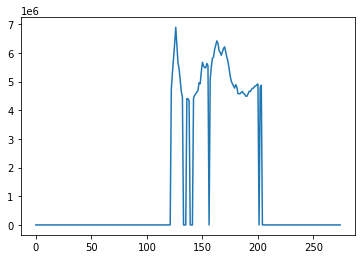

If I Can't Have You


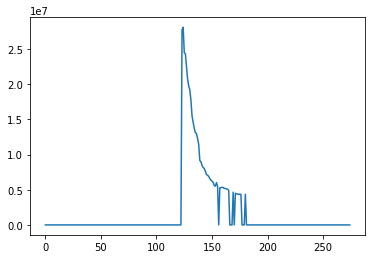

Bruises


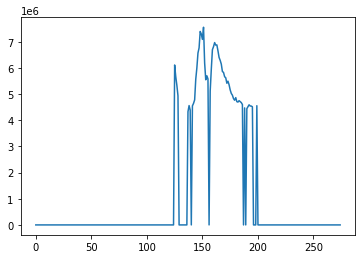

Every Breath You Take


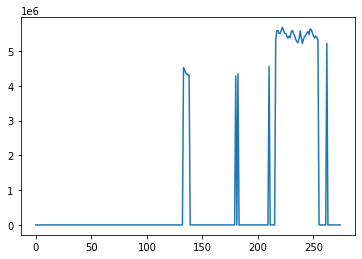

I.F.L.Y.


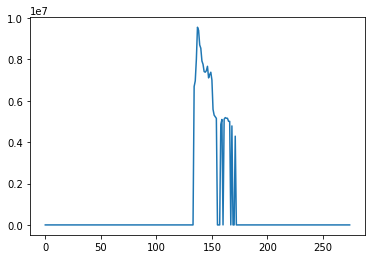

Memories


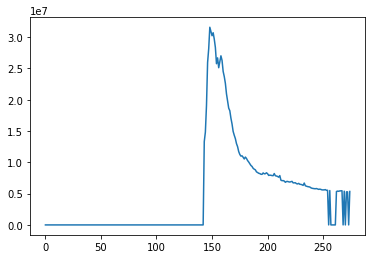

The Less I Know The Better


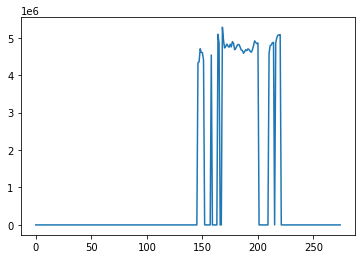

Dior


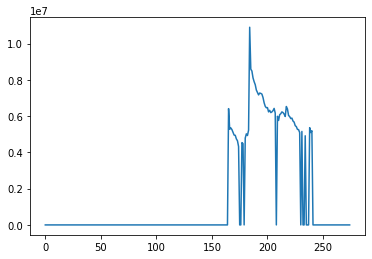

Do I Wanna Know?


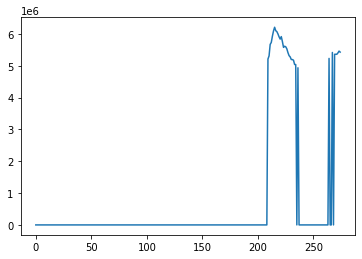

Stereo Hearts (feat. Adam Levine)


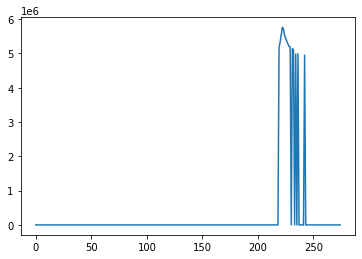

The Real Slim Shady


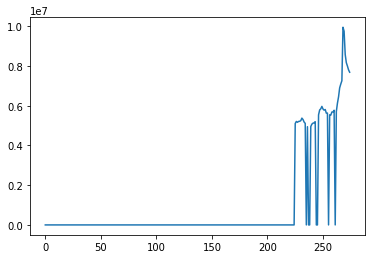

In [ ]:
for song in high_num_peak_songs:
  print(song)
  plt.plot(range(0, num_weeks), streams[song])
  plt.show()

# Songs with long maximum duration of peak

269
[0, 1358, 464, 266, 208, 186, 129, 105, 92, 82, 78, 66, 86, 66, 59, 47, 37, 43, 44, 33, 38, 35, 31, 31, 33, 26, 25, 32, 27, 34, 43, 22, 15, 25, 15, 22, 14, 18, 23, 11, 13, 6, 11, 14, 10, 15, 10, 8, 6, 8, 1, 12, 6, 3, 7, 6, 4, 5, 7, 4, 4, 3, 2, 3, 3, 5, 5, 4, 1, 4, 5, 1, 3, 1, 3, 5, 0, 0, 4, 1, 1, 2, 2, 1, 3, 0, 3, 0, 2, 0, 3, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
4237


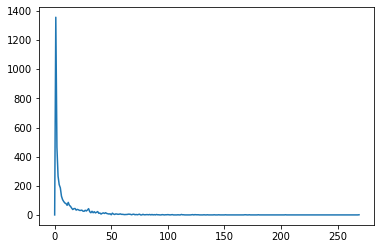

In [ ]:
max_max_peak_dur = np.max(peak_max_dur)
min_max_peak_dur = np.min(peak_max_dur)
print(max_max_peak_dur)
max_peak_dur_pdf = [0] * (max_max_peak_dur + 1)
for i in range(0, len(peak_max_dur)):
  max_peak_dur_pdf[peak_max_dur[i]] += 1

print(max_peak_dur_pdf)
plt.plot(range(0, max_max_peak_dur+1), max_peak_dur_pdf)
print(sum(max_peak_dur_pdf))

In [ ]:
# for song in high_max_peak_dur_songs:
#   print(song)
#   plt.plot(range(0, num_weeks), streams[song])
#   plt.show()

# Songs and their max peak values

In [ ]:
max_pk = np.max(mx_peak_vals)
min_pk = np.min(mx_peak_vals)
mean_pk = np.mean(mx_peak_vals)
median_pk = np.median(mx_peak_vals)
std_pk = np.std(mx_peak_vals)

print(min_pk, max_pk, mean_pk, median_pk, std_pk)
print(len(high_max_peak_songs))

2525159 84952932 10345369.257965542 7437136.0 8088426.5239217905
23


In [ ]:
# for song in high_max_peak_songs:
#   print(song)
#   plt.plot(range(0, num_weeks), streams[song])
#   plt.show()

# Songs with the characteristics:  High value of max peak (>1e7) and high maximum duration of peak (> 12 weeks = 3 months)

In [ ]:
songs_with_both = np.intersect1d(high_max_peak_songs, high_max_peak_dur_songs)
len(songs_with_both)

22

In [ ]:
for song in songs_with_both:
  print(song)
  plt.plot(range(0, num_weeks), streams[song])
  plt.show()

In [ ]:
feat_songs_with_both = np.intersect1d(songs_with_both, songs_with_id)
print(len(feat_songs_with_both))

22


In [ ]:
songs_with_both_feature_data = []

feats = ["artist", "max peak", "max peak dur", "danceability", 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'mode', 'tempo', 'gloom_index']
for song in feat_songs_with_both:
  temp = []
  temp.append(data[song]['artist'])
  temp.append(mx_peaks[song])
  temp.append(dur_peaks[song])
  for f in feats:
    feat_type = 'audio_features'
    if f == "gloom_index":
      feat_type = "lyrical_features" 
    if(f not in ["artist", "max peak", "max peak dur"]):
      temp.append(spotify_data[song][feat_type][0][f])
  songs_with_both_feature_data.append(temp)

features_songs_with_both_df = pd.DataFrame(songs_with_both_feature_data, feat_songs_with_both, feats)
features_songs_with_both_df

def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False


for feat in feats:
  if(isfloat(features_songs_with_both_df[feat][0])):
    print()
    print('Median '+str(feat)+str(":")+" "*(30-len(str(feat))), features_songs_with_both_df[feat].median())
    if(feat!="max peak" and feat != "max peak dur"):
      print(features_stats_df.at[feat, 'median'])
      if(features_songs_with_both_df[feat].median() < features_stats_df.at[feat, 'median']):
        print('lower\n')
      else:
        print('higher\n')


# Interesting Patterns and Exceptions

## Christmas Songs

Songs for christmas and ones that mention about christmas eve have a periodic apprearance of peak every year, i.e., after almost 52 weeks during Christmas. It can be seen from their graphs.

- It's Beginning to Look a Lot like Christmas
- It's the Most Wonderful Time of the Year
- Jingle Bell Rock
- Let It Snow! Let It Snow! Let It Snow! (with The B. Swanson Quartet)
- Feliz Navidad
- Do They Know It's Christmas? - 1984 Version
- Blue Christmas
- Santa Tell Me
- Happy Xmas (War Is Over) - Remastered 2010
- Mistletoe
- The Christmas Song (Merry Christmas To You)
- Fairytale of New York (feat. Kirsty MacColl)
- Run Rudolph Run - Single Version
- A Holly Jolly Christmas - Single Version
- Step Into Christmas
- Have Yourself A Merry Little Christmas
- Carol of the Bells
- My Only Wish (This Year)
- Christmas Lights
- Underneath the Tree
- September

Mistletoe


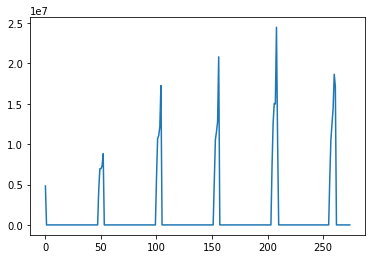

In [ ]:
print('Mistletoe')
plt.plot(range(0, num_weeks), streams['Mistletoe'])
plt.show()

# Event Triggered Effects

Talor Swift's Blank Space was released in 2014 but it is seen to have gotten sudden popularity in recent times. A reason behind this can be the inclusion of this song in her 2018 Reputation Stadium Tour.

Blank Space


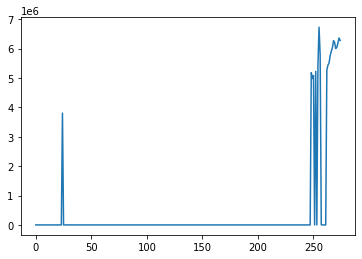

In [ ]:
print('Blank Space')
plt.plot(range(0, num_weeks), streams['Blank Space'])
plt.show()

Avicii's 2013 song 'Wake Me Up' can be seen as a song frequented by the listeners in recent times, especially after his demise.

Wake Me Up


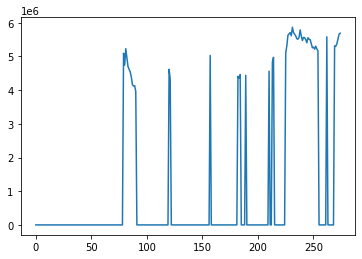

In [ ]:
print('Wake Me Up')
plt.plot(range(0, num_weeks), streams['Wake Me Up'])
plt.show()

An old classic song from the 1980s, 'Every Breath You Take' by The Police, can be seen to have risen to sudden prominence probably due to its use in famous Tv series 'Stranger Things'.

Every Breath You Take


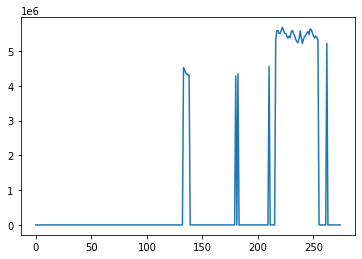

In [ ]:
print('Every Breath You Take')
plt.plot(range(0, num_weeks), streams['Every Breath You Take'])
plt.show()

## Famous Artists

In [ ]:
famous_artists={}
for ind in range(len(songs_with_id)):
  isFamous=0
  for week in data[songs_with_id[ind]]['data']:
    if int(week['position'])<10:
      isFamous=1
      break
  if isFamous:
    if data[songs_with_id[ind]]['artist'] in famous_artists:
      famous_artists[data[songs_with_id[ind]]['artist']].append(songs_with_id[ind])
    else:
      famous_artists[data[songs_with_id[ind]]['artist']]=[]
      famous_artists[data[songs_with_id[ind]]['artist']].append(songs_with_id[ind])

famous_artists

{'24kGoldn': ['Mood (feat. iann dior)'],
 '5 Seconds of Summer': ['Youngblood'],
 '6ix9ine': ['FEFE (feat. Nicki Minaj & Murda Beatz)', 'GOOBA'],
 'ACRAZE': ['Do It To It'],
 'Adele': ['Easy On Me', 'Oh My God', 'Can I Get It'],
 'Andy Williams': ["It's the Most Wonderful Time of the Year"],
 'Anitta': ['Envolver'],
 'Anuel AA': ['China'],
 'Ariana Grande': ['Santa Tell Me',
  'no tears left to cry',
  'God is a woman',
  'breathin',
  'thank u, next',
  'imagine',
  '7 rings',
  "break up with your girlfriend, i'm bored",
  'needy',
  'NASA',
  'bloodline',
  'bad idea',
  'boyfriend (with Social House)',
  'Don’t Call Me Angel (Charlie’s Angels) (with Miley Cyrus & Lana Del Rey)',
  'Stuck with U (with Justin Bieber)',
  'positions',
  '34+35'],
 'Arizona Zervas': ['ROXANNE'],
 'Ava Max': ['Sweet but Psycho'],
 'Avicii': ['SOS', 'SOS (feat. Aloe Blacc)'],
 'BLACKPINK': ['Kill This Love',
  'How You Like That',
  'Ice Cream (with Selena Gomez)',
  'Lovesick Girls'],
 'BTS': ['Boy With

In [ ]:
features = ["danceability", 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'mode', 'tempo', 'gloom_index']
famous_artist_features={}
for artist in famous_artists:
  if len(famous_artists[artist])==1:
    continue
  avg_features={}
  for feat in features:
    feat_type = 'audio_features'
    if feat == "gloom_index":
      feat_type = "lyrical_features" 
    val=0
    tot=0
    for song in famous_artists[artist]:
      tot+=1
      val+=float(spotify_data[song][feat_type][0][feat])
    avg_features[feat]=val/tot
  famous_artist_features[artist]=avg_features
    

In [ ]:
famous_artist_features

{'6ix9ine': {'acousticness': 0.0586,
  'danceability': 0.7705,
  'energy': 0.5369999999999999,
  'gloom_index': 38.5510852952204,
  'instrumentalness': 0.0,
  'liveness': 0.196,
  'loudness': -7.409000000000001,
  'mode': 1.0,
  'speechiness': 0.37250000000000005,
  'tempo': 152.23,
  'valence': 0.388},
 'Adele': {'acousticness': 0.2287,
  'danceability': 0.6136666666666666,
  'energy': 0.5903333333333333,
  'gloom_index': 33.36783479747559,
  'instrumentalness': 0.0,
  'liveness': 0.11246666666666667,
  'loudness': -5.847666666666666,
  'mode': 0.6666666666666666,
  'speechiness': 0.0391,
  'tempo': 109.35466666666667,
  'valence': 0.4053333333333334},
 'Ariana Grande': {'acousticness': 0.2213570588235294,
  'danceability': 0.6794705882352942,
  'energy': 0.5908823529411764,
  'gloom_index': 31.801007268078873,
  'instrumentalness': 0.0032205211764705886,
  'liveness': 0.1878294117647059,
  'loudness': -6.06829411764706,
  'mode': 0.6470588235294118,
  'speechiness': 0.118864705882352

In [ ]:
features = ["danceability", 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'mode', 'tempo', 'gloom_index']

for feat in features:
  temp = []
  for artist in famous_artist_features:
    temp.append(famous_artist_features[artist][feat])
  print('Median '+str(feat)+": ", np.median(temp))
  print(features_stats_df.at[feat, 'median'])
  if(np.median(temp) < features_stats_df.at[feat, 'median']):
    print('lower\n')
  else:
    print('higher\n')
  print()

    

## Famous Songs

In [ ]:
famous_songs=[]
for ind in range(len(songs_with_id)):
  isFamous=0
  cnt=0
  for week in data[songs_with_id[ind]]['data']:
    if int(week['position'])<100:
      cnt+=1
  if cnt>=100:
      famous_songs.append(songs_with_id[ind])

famous_songs

['Shape of You',
 'Believer',
 'lovely (with Khalid)',
 'Lucid Dreams',
 'Shallow',
 'Sunflower - Spider-Man: Into the Spider-Verse',
 'Someone You Loved',
 'Dance Monkey',
 "Don't Start Now",
 'Watermelon Sugar',
 'Blinding Lights']

In [ ]:
features = ["danceability", 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'mode', 'tempo', 'gloom_index']
famous_song_features={}
for song in famous_songs:
  song_feat={}
  for feat in features:
    feat_type = 'audio_features'
    if feat == "gloom_index":
      feat_type = "lyrical_features" 
    val=float(spotify_data[song][feat_type][0][feat])
    song_feat[feat]=val
  famous_song_features[song]=song_feat
famous_song_features

{'Believer': {'acousticness': 0.0622,
  'danceability': 0.776,
  'energy': 0.78,
  'gloom_index': 31.958732039479067,
  'instrumentalness': 0.0,
  'liveness': 0.081,
  'loudness': -4.374,
  'mode': 0.0,
  'speechiness': 0.128,
  'tempo': 124.949,
  'valence': 0.666},
 'Blinding Lights': {'acousticness': 0.00146,
  'danceability': 0.514,
  'energy': 0.73,
  'gloom_index': 34.070047332815314,
  'instrumentalness': 9.54e-05,
  'liveness': 0.0897,
  'loudness': -5.934,
  'mode': 1.0,
  'speechiness': 0.0598,
  'tempo': 171.005,
  'valence': 0.334},
 'Dance Monkey': {'acousticness': 0.692,
  'danceability': 0.824,
  'energy': 0.588,
  'gloom_index': 29.213484057256757,
  'instrumentalness': 0.000104,
  'liveness': 0.149,
  'loudness': -6.4,
  'mode': 0.0,
  'speechiness': 0.0924,
  'tempo': 98.027,
  'valence': 0.513},
 "Don't Start Now": {'acousticness': 0.0123,
  'danceability': 0.793,
  'energy': 0.793,
  'gloom_index': 23.527238938294502,
  'instrumentalness': 0.0,
  'liveness': 0.0951,

# Year-wise Trends

danceability


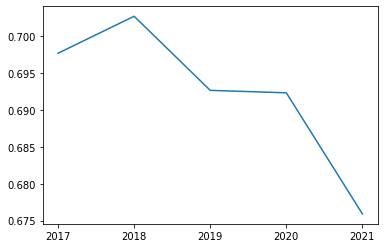

energy


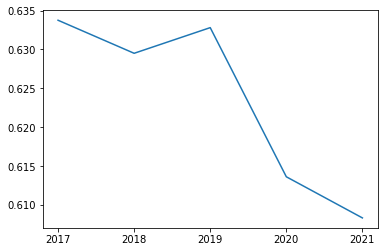

loudness


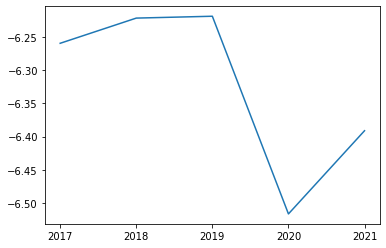

speechiness


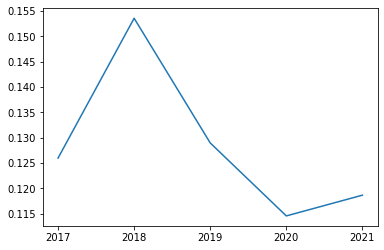

acousticness


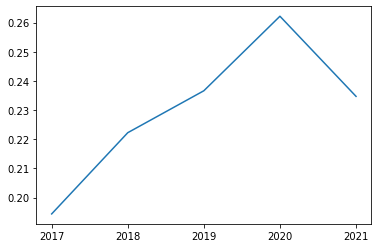

instrumentalness


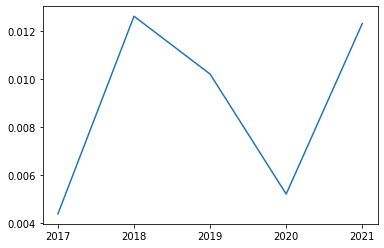

liveness


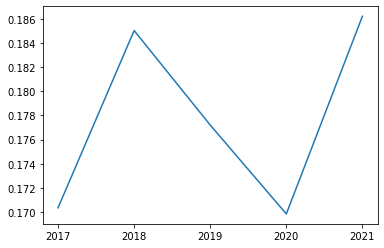

valence


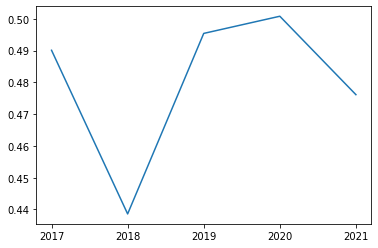

mode


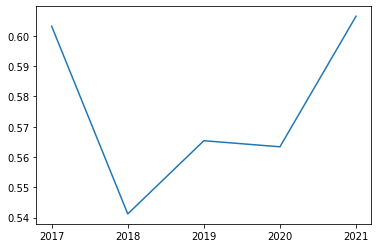

tempo


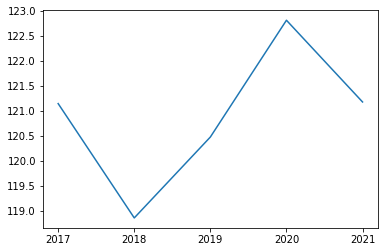

gloom_index


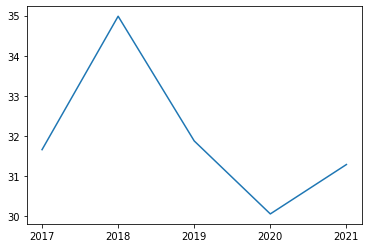

In [ ]:
year_week = {'2017': [2, 54], '2018': [54, 106], '2019': [106, 158], '2020': [158, 210], '2021': [210, 262]}
years = ['2017', '2018', '2019', '2020', '2021']


features = ["danceability", 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'mode', 'tempo', 'gloom_index']

year_features = {}

for year in years:
  year_features[year] = {}
  count = 0
  for feat in features:
    year_features[year][feat] = 0.0
  for song in final_songs:
    if int(start_end_points[song]["start"]) >= year_week[year][0] and int(start_end_points[song]["start"]) < year_week[year][1]:
      count+=1
      for feat in features:
        feat_type = 'audio_features'
        if feat == "gloom_index":
          feat_type = "lyrical_features" 
        val=float(spotify_data[song][feat_type][0][feat])
        year_features[year][feat] += val
  for feat in features:
    year_features[year][feat] = year_features[year][feat]/count

for feat in features:
  print(feat)
  plt.plot(years, [year_features[year][feat] for year in years])
  plt.show()
